## Q1

Chosen constant c = 1.5546440448668126
Accepted samples (first 10): [[0.54976767 0.12601821]
 [0.46687731 0.40472123]
 [0.39522456 0.06621279]
 [0.82861039 0.58830888]
 [0.60358621 0.01345581]
 [0.6963022  0.71632595]
 [0.70977228 0.59466553]
 [0.24297919 0.44567383]
 [0.34241435 0.70747955]
 [0.83149034 0.21579613]]
Rejected samples (first 10): [[0.86852847 0.8370057 ]
 [0.84934886 0.7048585 ]
 [0.94887029 0.45027566]
 [0.9301149  0.87925754]
 [0.10155589 0.32391145]
 [0.04263091 0.67766338]
 [0.88820285 0.85516313]
 [0.16814528 0.91123345]
 [0.3040412  0.71599678]
 [0.3572884  0.81101444]]


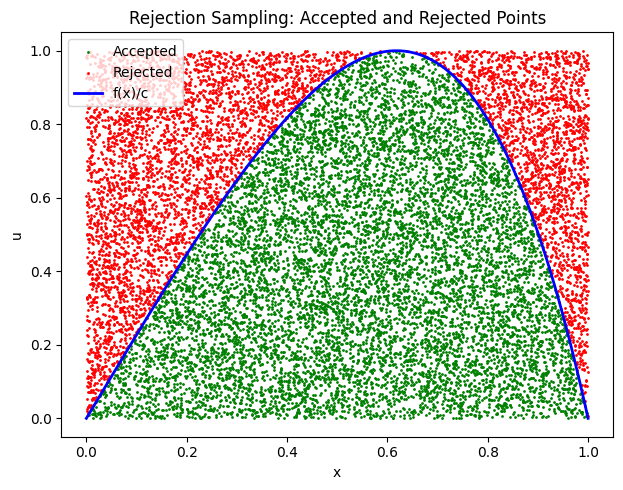

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x * (1 - x) * np.exp(x)) / (3 - np.e)

xs = np.linspace(0, 1, 10000)
c = np.max(f(xs))
print("Chosen constant c =", c)

def rejection_sample(n):
    accepted = []
    rejected = []
    while len(accepted) < n:
        x = np.random.rand()
        u = np.random.rand()
        if u <= f(x) / c:
            accepted.append((x, u))
        else:
            rejected.append((x, u))
    return np.array(accepted), np.array(rejected)

accepted, rejected = rejection_sample(10000)
print("Accepted samples (first 10):", accepted[:10])
print("Rejected samples (first 10):", rejected[:10])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(accepted[:, 0], accepted[:, 1], color='green', s=1, label='Accepted')
plt.scatter(rejected[:, 0], rejected[:, 1], color='red', s=1, label='Rejected')
plt.plot(xs, f(xs)/c, 'b-', lw=2, label='f(x)/c')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Rejection Sampling: Accepted and Rejected Points')
plt.legend()

plt.tight_layout()
plt.show()


## Q2

Chosen constant c = 3.1915126598667434


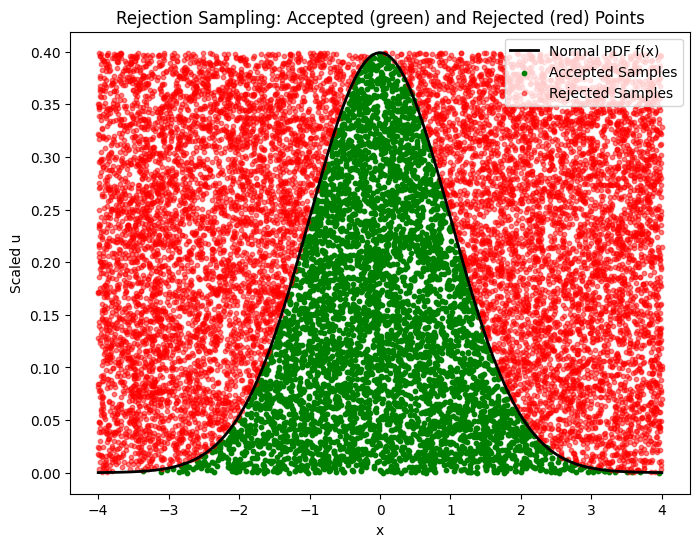

In [2]:
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def h(x):
    return 1 / 8 if -4 <= x <= 4 else 0

x_vals = np.linspace(-4, 4, 1000)
c = np.max(f(x_vals) / (1 / 8))
print("Chosen constant c =", c)

def rejection_sampling_normal(n_samples):
    accepted_x = []
    accepted_y = []
    rejected_x = []
    rejected_y = []

    while len(accepted_x) < n_samples:
        x = np.random.uniform(-4, 4)
        u = np.random.uniform(0, 1)
        y = u * c * (1 / 8)
        if y <= f(x):
            accepted_x.append(x)
            accepted_y.append(y)
        else:
            rejected_x.append(x)
            rejected_y.append(y)

    return (np.array(accepted_x), np.array(accepted_y),
            np.array(rejected_x), np.array(rejected_y))

accepted_x, accepted_y, rejected_x, rejected_y = rejection_sampling_normal(5000)

plt.figure(figsize=(8, 6))
x_plot = np.linspace(-4, 4, 1000)
plt.plot(x_plot, f(x_plot), 'k-', linewidth=2, label="Normal PDF f(x)")
plt.scatter(accepted_x, accepted_y, color='green', s=10, label="Accepted Samples")
plt.scatter(rejected_x, rejected_y, color='red', s=10, alpha=0.5, label="Rejected Samples")

plt.xlabel("x")
plt.ylabel("Scaled u")
plt.title("Rejection Sampling: Accepted (green) and Rejected (red) Points")
plt.legend()
plt.show()


## Q3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def generate_stochastic_matrix(n):
    matrix = np.random.rand(n, n)
    matrix = matrix / matrix.sum(axis=1, keepdims=True)
    return matrix
def simulate_markov_chain(P, initial_state, num_steps):
    states = [initial_state]
    for _ in range(num_steps):
        current_state = states[-1]
        next_state = np.random.choice(range(len(P)), p=P[current_state])
        states.append(next_state)
    return states
def compute_hitting_time(P, target_state, max_steps=1000):
    n = len(P)
    hitting_times = np.full(n, np.inf)
    for start_state in range(n):
        if start_state == target_state:
            hitting_times[start_state] = 0
            continue
        steps = 0
        current_state = start_state
        while steps < max_steps:
            current_state = np.random.choice(range(n), p=P[current_state])
            steps += 1
            if current_state == target_state:
                hitting_times[start_state] = steps
                break
    return hitting_times
def simulate_hitting_time_distribution(P, start_state, target_state, n_trials=1000, max_steps=1000):
    hitting_times = []
    for _ in range(n_trials):
        steps = 0
        current_state = start_state
        while steps < max_steps:
            current_state = np.random.choice(range(len(P)), p=P[current_state])
            steps += 1
            if current_state == target_state:
                hitting_times.append(steps)
                break
    return np.array(hitting_times)
def plot_hitting_time_pdf(hitting_times, bins=30):
    plt.figure(figsize=(10, 5))
    plt.hist(hitting_times, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.xlabel("Hitting Time (steps)")
    plt.ylabel("Probability Density")
    plt.title("PDF of Hitting Time to State 0")
    plt.grid(True)
    plt.show()
def plot_markov_chain_trajectory(markov_chain):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(markov_chain)), markov_chain, marker='o', linestyle='-', color='b')
    plt.xlabel("Steps")
    plt.ylabel("State")
    plt.title("Markov Chain Trajectory")
    plt.grid(True)
    plt.show()
np.random.seed(42)
n_states = 10
P = generate_stochastic_matrix(n_states)
initial_state = np.random.choice(n_states)
num_steps = 50
markov_chain = simulate_markov_chain(P, initial_state, num_steps)
target_state = 0
hitting_times = compute_hitting_time(P, target_state)
pd.DataFrame(P)



,0,1,2,3,4,5,6,7,8,9
0,0.072008,0.182782,0.140731,0.115096,0.029996,0.029991,0.011167,0.166529,0.115569,0.136132
1,0.005208,0.245380,0.210602,0.053720,0.046000,0.046400,0.076971,0.132760,0.109279,0.073679
2,0.152815,0.034840,0.072966,0.091502,0.113907,0.196104,0.049870,0.128434,0.147960,0.011601
3,0.119297,0.033484,0.012773,0.186322,0.189611,0.158736,0.059814,0.019179,0.134355,0.086428
4,0.030166,0.122400,0.008500,0.224769,0.063966,0.163765,0.077050,0.128552,0.135138,0.045693
5,0.168511,0.134715,0.163282,0.155518,0.103913,0.160219,0.015380,0.034061,0.007860,0.056541
6,0.083163,0.058059,0.177319,0.076332,0.060110,0.116117,0.030153,0.171640,0.015951,0.211157
7,0.169819,0.043698,0.001214,0.179322,0.155440,0.160311,0.169605,0.016283,0.078828,0.025480
8,0.164601,0.118868,0.063105,0.012121,0.059307,0.062015,0.139142,0.121587,0.169199,0.090055
9,0.026557,0.158385,0.168941,0.124638,0.171202,0.109653,0.116079,0.094941,0.005645,0.023959



Hitting Times to State 0 : [ 0.  6.  9.  9. 64. 28.  7.  1.  5.  2.]


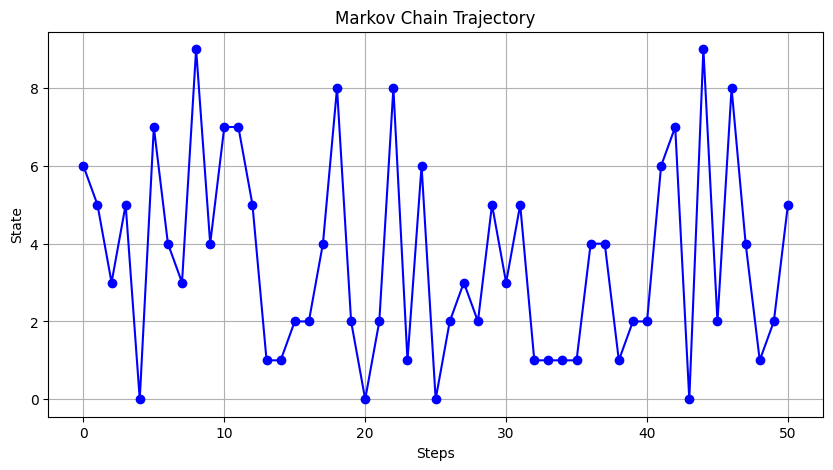


Simulated 1000 hitting times from state 6 to state 0


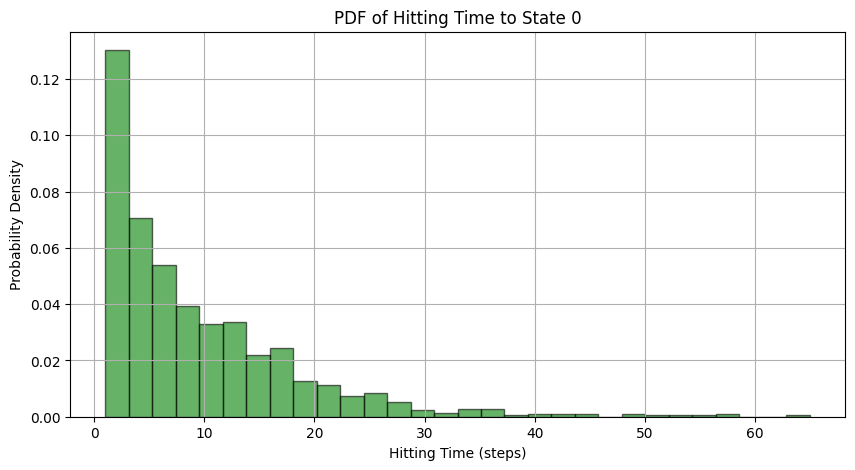

In [10]:
print("\nHitting Times to State", target_state, ":", hitting_times)
plot_markov_chain_trajectory(markov_chain)
if initial_state == target_state:
    start_state_for_pdf = 1
else:
    start_state_for_pdf = initial_state
n_trials = 1000
hitting_time_samples = simulate_hitting_time_distribution(P, start_state_for_pdf, target_state, n_trials=n_trials)
print(f"\nSimulated {n_trials} hitting times from state {start_state_for_pdf} to state {target_state}")
plot_hitting_time_pdf(hitting_time_samples)

## Q4

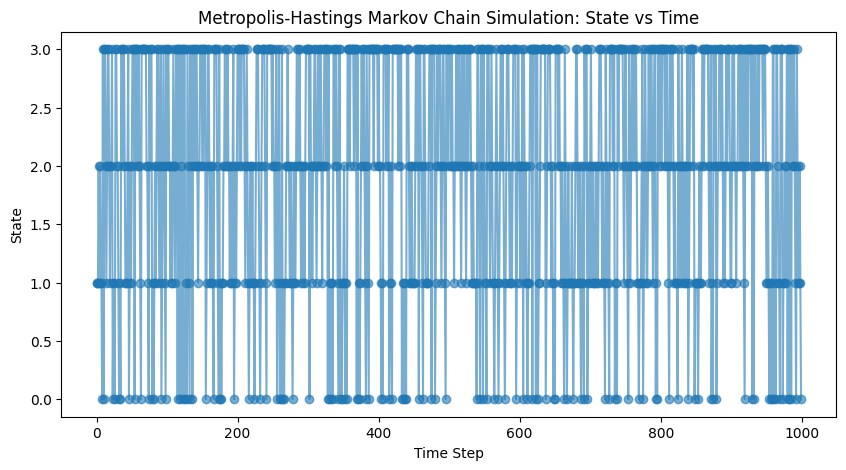

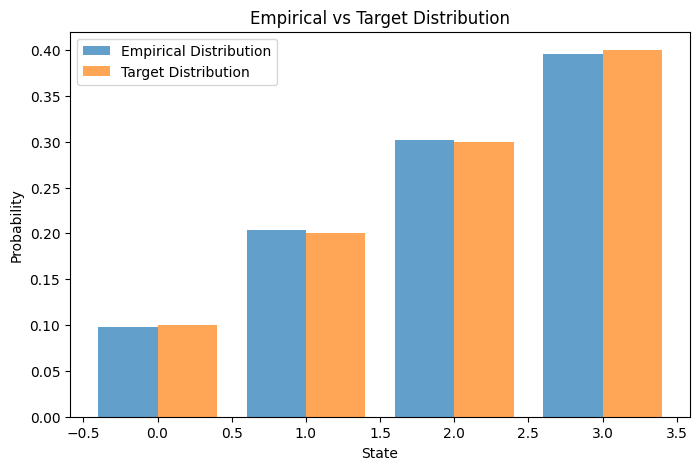

First 10 states: [1 1 1 2 1 2 1 1 0 3]


In [4]:
def metropolis_hastings(P, pi, num_samples=10000):
    states = np.arange(len(pi))
    X = np.zeros(num_samples, dtype=int)
    X[0] = np.random.choice(states)

    for m in range(1, num_samples):
        i = X[m - 1]
        j = np.random.choice(states, p=P[i])
        a_ij = min(1, (pi[j] * P[j, i]) / (pi[i] * P[i, j]))

        if np.random.rand() <= a_ij:
            X[m] = j
        else:
            X[m] = i

    return X

P = np.array([[0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0],
              [0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0]])

pi = np.array([0.1, 0.2, 0.3, 0.4])

samples = metropolis_hastings(P, pi)

plt.figure(figsize=(10, 5))
plt.plot(samples[:1000], marker='o', linestyle='-', alpha=0.6)
plt.xlabel("Time Step")
plt.ylabel("State")
plt.title("Metropolis-Hastings Markov Chain Simulation: State vs Time")
plt.show()

unique, counts = np.unique(samples, return_counts=True)
empirical_distribution = counts / len(samples)

plt.figure(figsize=(8, 5))
plt.bar(unique - 0.2, empirical_distribution, width=0.4, label="Empirical Distribution", alpha=0.7)
plt.bar(unique + 0.2, pi, width=0.4, label="Target Distribution", alpha=0.7)
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Empirical vs Target Distribution")
plt.legend()
plt.show()

print("First 10 states:", samples[:10])


## Q5

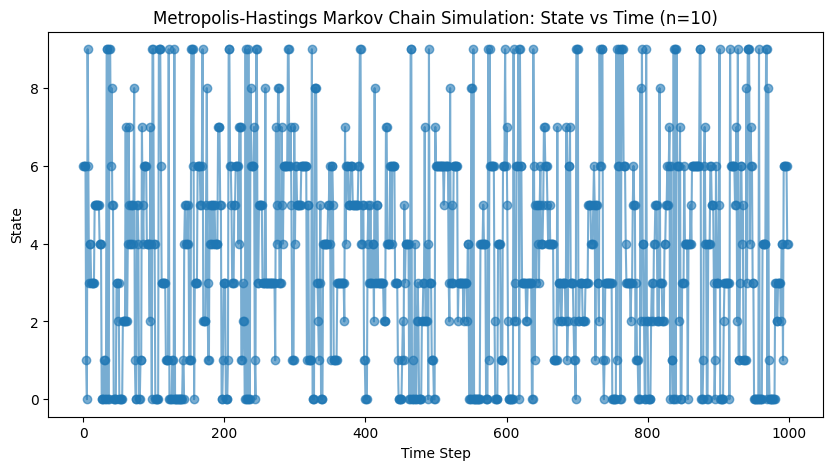

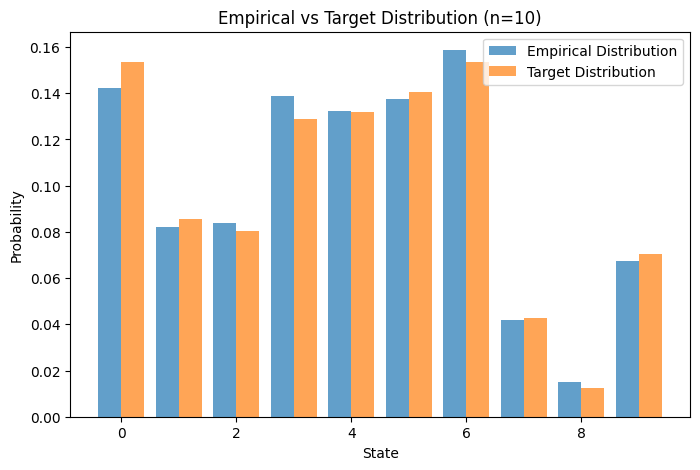

First 10 states for n=10: [6 6 6 6 1 0 9 6 3 4]


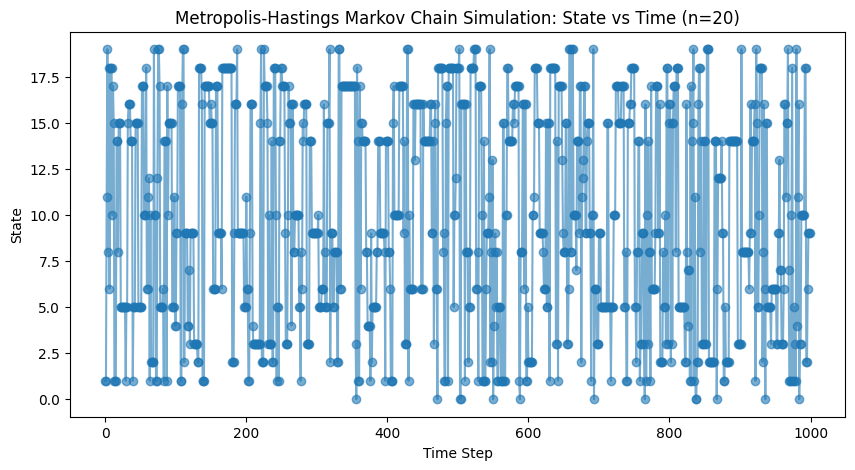

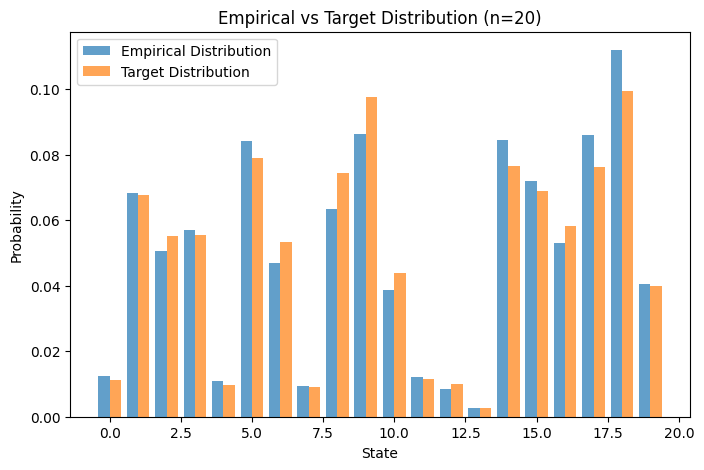

First 10 states for n=20: [ 1  1 11 19  8 18  6 18 18 18]


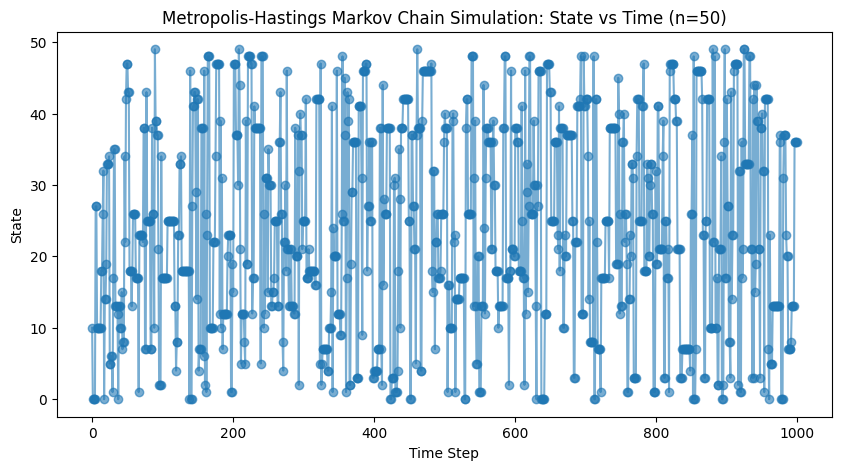

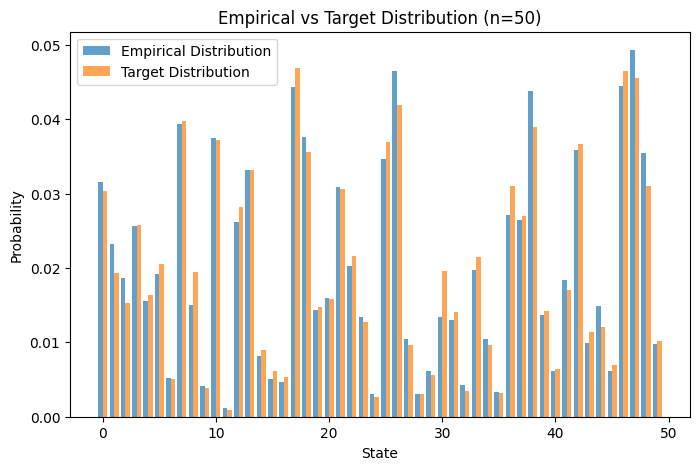

First 10 states for n=50: [10  0  0  0  0 27 27 10 10 10]


In [5]:
def metropolis_hastings(P, pi, num_samples=10000):
    states = np.arange(len(pi))
    X = np.zeros(num_samples, dtype=int)
    X[0] = np.random.choice(states)
    for m in range(1, num_samples):
        i = X[m - 1]
        j = np.random.choice(states, p=P[i])
        a_ij = min(1, (pi[j] * P[j, i]) / (pi[i] * P[i, j]))
        if np.random.rand() <= a_ij:
            X[m] = j
        else:
            X[m] = i
    return X

def run_large_example(n):
    P = np.random.rand(n, n)
    P /= P.sum(axis=1, keepdims=True)
    pi = np.random.rand(n)
    pi /= pi.sum()
    samples = metropolis_hastings(P, pi)
    plt.figure(figsize=(10, 5))
    plt.plot(samples[:1000], marker='o', linestyle='-', alpha=0.6)
    plt.xlabel("Time Step")
    plt.ylabel("State")
    plt.title(f"Metropolis-Hastings Markov Chain Simulation: State vs Time (n={n})")
    plt.show()
    unique, counts = np.unique(samples, return_counts=True)
    empirical_distribution = counts / len(samples)
    plt.figure(figsize=(8, 5))
    plt.bar(unique - 0.2, empirical_distribution, width=0.4, label="Empirical Distribution", alpha=0.7)
    plt.bar(unique + 0.2, pi, width=0.4, label="Target Distribution", alpha=0.7)
    plt.xlabel("State")
    plt.ylabel("Probability")
    plt.title(f"Empirical vs Target Distribution (n={n})")
    plt.legend()
    plt.show()
    print(f"First 10 states for n={n}:", samples[:10])

for n in [10, 20, 50]:
    run_large_example(n)
